# Module 3 - Deep Diving Into Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#!pip install xgboost
from xgboost import XGBClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
print(sklearn.__version__)

1.1.2


In [3]:
cnames=['Wine','Alcohol','Malic Acid','Ash','Acl','Mg','Phenols','Flavanoids','Nonflavonoid Phenols','Proanth','Color Int','Hue','OD','Proline']
df = pd.read_csv('wine.data', names=cnames)
df.head()

,Wine,Alcohol,Malic Acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavonoid Phenols,Proanth,Color Int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.tail()

,Wine,Alcohol,Malic Acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavonoid Phenols,Proanth,Color Int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic Acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavonoid Phenols    0
Proanth                 0
Color Int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavonoid Phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color Int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wine,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavonoid Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


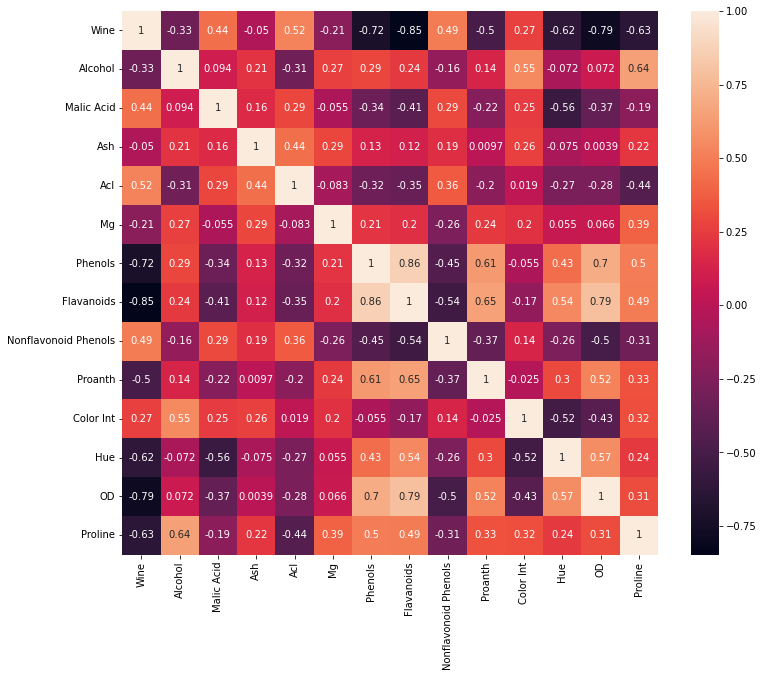

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

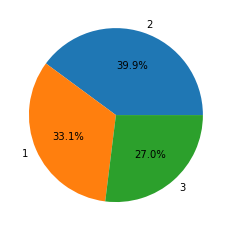

In [9]:
plt.pie(df['Wine'].value_counts().tolist(),labels=df['Wine'].value_counts().keys().tolist(),autopct="%0.1f%%")
plt.show()

In [10]:
X = df.drop(columns='Wine')
Y = df.Wine

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75, random_state=0)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [14]:
models = []

models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('ADAB', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier(n_estimators=10, max_depth=5)))

results = []
names = []
res = []

for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    names.append(name)
    results.append(cv_results)
    res.append(cv_results.mean())
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART: 0.903297 (0.055828)
LR: 0.977473 (0.034441)
KNN: 0.954396 (0.050719)
NB: 0.969780 (0.037042)
LDA: 0.984615 (0.030769)
SVM: 0.962637 (0.037411)
RFC: 0.977473 (0.034441)
ADAB: 0.813736 (0.151641)
XGB: 0.962088 (0.037944)


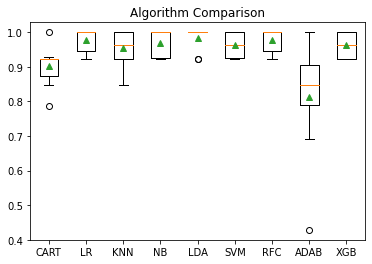

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
plt.boxplot(results, showmeans = True)
ax.set_xticklabels(names)
plt.title('Algorithm Comparison')
plt.show()

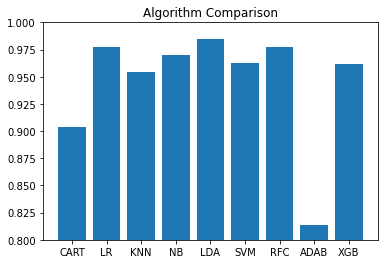

In [16]:
plt.bar(names, res)
plt.title('Algorithm Comparison')
plt.xticks(names)
plt.ylim(0.8, 1)
plt.show()

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [18]:
Y_pred=rfc.predict(X_test)

In [19]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[16  0  0]
 [ 0 20  1]
 [ 0  0  8]]
Accuracy Score: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.98        21
           2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [20]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [21]:
Y_pred=lda.predict(X_test)

In [22]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]
Accuracy Score: 0.9777777777777777
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00         8

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [23]:
lr = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
lr.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [24]:
Y_pred=lr.predict(X_test)

In [25]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]
Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [26]:
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [27]:
Y_pred=nb.predict(X_test)

In [28]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[16  0  0]
 [ 2 18  1]
 [ 0  0  8]]
Accuracy Score: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



In [29]:
svm = SVC(gamma='auto')
svm.fit(X_train,Y_train)

SVC(gamma='auto')

In [30]:
Y_pred=svm.predict(X_test)

In [31]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]
Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [32]:
xgb = XGBClassifier(n_estimators=10, max_depth=5)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [33]:
Y_pred=xgb.predict(X_test)

In [34]:
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]
Accuracy Score: 0.9555555555555556
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



In [35]:
X = df.drop(columns='Wine')
Y = df.Wine

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=0)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
Y_train, Y_test = to_categorical(Y_train), to_categorical(Y_test)

In [39]:
model=Sequential()
model.add(Dense(128, activation ='relu', input_dim=13))
model.add(Dense(64, activation ='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(3, activation ='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 12,707
Trainable params: 12,707
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test,Y_test))

Epoch 1/100
14/14 [==============================] - 3s 82ms/step - loss: 1.0084 - accuracy: 0.5564 - val_loss: 0.8169 - val_accuracy: 0.9556
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6633 - accuracy: 0.9173 - val_loss: 0.4959 - val_accuracy: 1.0000
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.3566 - accuracy: 0.9474 - val_loss: 0.2029 - val_accuracy: 1.0000
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.1593 - accuracy: 0.9850 - val_loss: 0.0702 - val_accuracy: 1.0000
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0727 - accuracy: 0.9925 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 7/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 

14/14 [==============================] - 0s 14ms/step - loss: 1.5221e-04 - accuracy: 1.0000 - val_loss: 3.3675e-04 - val_accuracy: 1.0000
Epoch 57/100
14/14 [==============================] - 0s 12ms/step - loss: 1.4706e-04 - accuracy: 1.0000 - val_loss: 3.3633e-04 - val_accuracy: 1.0000
Epoch 58/100
14/14 [==============================] - 0s 13ms/step - loss: 1.4181e-04 - accuracy: 1.0000 - val_loss: 3.3518e-04 - val_accuracy: 1.0000
Epoch 59/100
14/14 [==============================] - 0s 11ms/step - loss: 1.3627e-04 - accuracy: 1.0000 - val_loss: 3.2857e-04 - val_accuracy: 1.0000
Epoch 60/100
14/14 [==============================] - 0s 13ms/step - loss: 1.3218e-04 - accuracy: 1.0000 - val_loss: 3.2086e-04 - val_accuracy: 1.0000
Epoch 61/100
14/14 [==============================] - 0s 14ms/step - loss: 1.2795e-04 - accuracy: 1.0000 - val_loss: 3.1535e-04 - val_accuracy: 1.0000
Epoch 62/100
14/14 [==============================] - 0s 11ms/step - loss: 1.2288e-04 - accuracy: 1.0000 - 

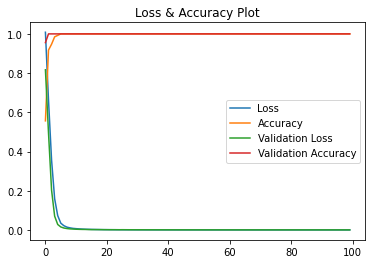

In [41]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Loss & Accuracy Plot')
plt.legend()
plt.show()

In [42]:
Y_pred=model.predict(X_test)

2/2 [==============================] - 0s 17ms/step


In [43]:
Y_pred

array([[9.99998689e-01, 2.13874543e-07, 1.05146228e-06],
       [3.57035397e-08, 6.85533763e-08, 9.99999881e-01],
       [6.23979588e-08, 9.99999762e-01, 7.13725186e-08],
       [9.99996424e-01, 1.55026532e-06, 2.01953367e-06],
       [3.27399408e-04, 9.99656200e-01, 1.64656994e-05],
       [5.82611028e-05, 9.99940991e-01, 6.60522915e-07],
       [1.00000000e+00, 1.09011167e-09, 7.34600780e-09],
       [8.36380138e-08, 1.36040899e-06, 9.99998569e-01],
       [3.73185713e-07, 9.99997854e-01, 1.80884422e-06],
       [2.37457858e-08, 9.99999762e-01, 2.62233868e-07],
       [2.58763976e-06, 1.86883244e-05, 9.99978781e-01],
       [3.07350696e-08, 4.79345317e-07, 9.99999523e-01],
       [1.00000000e+00, 1.84076018e-10, 5.29791722e-09],
       [7.23332560e-05, 9.99924421e-01, 3.27057774e-06],
       [8.38106700e-07, 6.82127563e-07, 9.99998450e-01],
       [5.68900049e-12, 1.00000000e+00, 9.17347656e-11],
       [1.00000000e+00, 1.03546922e-08, 3.52847564e-08],
       [1.00000000e+00, 1.42861

In [44]:
print(confusion_matrix(np.argmax(Y_test,axis=1)[:],np.argmax(Y_pred,axis=1)[:]))
print('Accuracy Score:', accuracy_score(np.argmax(Y_test,axis=1)[:],np.argmax(Y_pred,axis=1)[:]))
print(classification_report(np.argmax(Y_test,axis=1)[:],np.argmax(Y_pred,axis=1)[:]))

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]
Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [45]:
print('Weights:', model.get_weights()[0])
print('Biases:', model.get_weights()[1])

Weights: [[ 0.14095877 -0.16289462  0.14259778 ...  0.14211276  0.11450736
  -0.1310252 ]
 [-0.11066317 -0.00950114 -0.0728606  ...  0.05437367 -0.16406406
  -0.02095442]
 [-0.05690414  0.09407035 -0.02182847 ...  0.21434562  0.04220793
  -0.12742542]
 ...
 [ 0.05241355  0.11459102  0.16200453 ... -0.17716458 -0.12865396
   0.17505908]
 [ 0.15656233  0.02014412 -0.08183912 ... -0.11919005 -0.15144566
  -0.10419309]
 [ 0.14096193  0.02560394 -0.1696798  ...  0.18288904  0.00184705
  -0.1842557 ]]
Biases: [ 0.0654134  -0.02895786  0.0622857   0.04403127 -0.0001486  -0.00204628
  0.05747344  0.08543628  0.03372343  0.00564895  0.03282164  0.01953147
  0.03007133  0.05803353  0.00483721  0.01132508  0.00630988 -0.02590782
  0.00311412  0.03964176  0.00545147  0.0190775   0.05185995  0.02778325
  0.03414601  0.03414978  0.01232699  0.01243094  0.01471303 -0.01274262
  0.04305423  0.04394349 -0.03599172  0.05384329  0.0393894   0.02186359
  0.02977696  0.02020166  0.0024286   0.09694079 -0.0